# Nouh RIFAI

# INTRODUCTION

        Tout d’abord, un système de recommandation est un outil de business, cela renforce jusqu’à 30% les revenus d’une entreprise. Aujourd’hui, un utilisateur ne veut pas qu’on lui propose sur internet des produits qu’il a déjà achetés ou bien qui ne lui intéressent pas. C’est pourquoi les systèmes de recommandation ont pour objectif de comprendre le comportement de l’utilisateur. Cela facilitera sa vie et le site ou l’application gagnera sa confiance.
        Aujourd’hui de nombreux secteurs utilisent les systèmes de recommandation. Pour preuve, ils sont présents dans les boutiques en ligne comme Amazon, les services de streaming comme Netflix ou Spotify ou encore les systèmes de recommandation spécifiques pour la publicité basée sur du contenu. Ces systèmes de recommandation partagent le même principe qui est de filtrer à l’avance parmi une grande masse d’objets susceptibles d’intéresser l’acheteur (qu’il s’agisse de produits, livres, films etc.).

## Travail à faire:
    Réaliser un système de recommandation de films, avec les différentes méthodes possibles à savoir :
    1 - Recommandation démographique
    2 - REcommandation basée sur le contenu
    3 - Recommandation basée sur le filtrage collaboratif
    
    Pour finalement offrir une mixture de solutions qui fournira des résultats intéressants et pertinents.
    
    Pour ce faire, on va chercher une ou des datasets parmi les diverses et variées datatsets présentes sur Internet.

## !! IMPORTANT !!
    Avant de commencer veiller à ce que les librairies pandas, seaborn, surprise, scikit-learn, wordcloud et circlify
    Certains cellules dont les titres sont marqués avec (cross-validation) servent à évaluer chaque algorithme de machine learning utilisé, de plus elles prennent un énorme temps pour s'exécuter, alors on les a mis en mode raw.
    Tous les datatsets qu'on aura besoin sont incluses dans le répertoire du projet, à l'exception d'une dataset (avec une taille de 700 Mo) utilisée pour la cross-validation pour l'algorithme SVD, mais que on a indiqué la source dans la partie où elle est utiliséé.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import pandas as pd
import seaborn as sns

In [2]:
movies = pd.read_csv('./IMDB-Movie-Data.csv')
movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [3]:
movies.size

12000

In [4]:
movies.shape

(1000, 12)

        Dataset n'est pas assez grande. Toutefois, elle peut servira comme un grand atout car elle contient la colonne metascore.

        Sinon on rajoutera une autre dataset ayant plus de lignes (8934)

In [6]:
crd_df = pd.read_csv('./tmdb_5000_credits.csv')
mv_df = pd.read_csv('./tmdb_5000_movies.csv')

In [7]:
crd_df

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [8]:
mv_df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [9]:
crd_df.columns = ['id','title','cast','crew']
mv_df = mv_df.merge(crd_df, on='id')
mv_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [10]:
mv_df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_x                    0
vote_average               0
vote_count                 0
title_y                    0
cast                       0
crew                       0
dtype: int64

In [11]:
mv_df[mv_df['overview'].isna()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",NaN,370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,Chiamatemi Francesco - Il Papa della gente,NaN,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]",...,NaN,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,NaN,Chiamatemi Francesco - Il Papa della gente,7.3,12,Chiamatemi Francesco - Il Papa della gente,"[{""cast_id"": 5, ""character"": ""Jorge Mario Berg...","[{""credit_id"": ""5660019ac3a36875f100252b"", ""de..."
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,"To Be Frank, Sinatra at 100",NaN,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]",...,NaN,[],Released,NaN,"To Be Frank, Sinatra at 100",0.0,0,"To Be Frank, Sinatra at 100","[{""cast_id"": 0, ""character"": ""Narrator"", ""cred...","[{""credit_id"": ""592b25e4c3a368783e065a2f"", ""de..."
4431,913000,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,292539,[],de,Food Chains,NaN,0.795698,[],...,83.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Food Chains,7.4,8,Food Chains,[],"[{""credit_id"": ""5470c3b1c3a368085e000abd"", ""de..."


# Demographic Recommandation

### étapes à suivre :
- attribuer un score à chaque film (éventuellement rajouter l'analyse sentimentale des tweets sur les films)
- trier et afficher les meilleurs films à recommander

    - Attribuer un score à chaque film

    Afin d'attribuer un score, on ne doit pas se baser seulement sur la moyenne des notes attribuées à un film. Puisque un film noté 7.8 avec 2 votes en total n'est nullement équivalent à un film ayant la même note mais avec un total de votes de 5000.
    Ainsi, nous allons plutôt se baser la note pondérée, une technique proposée par IMDB.
    Cette note est calculée comme suivant :

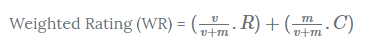

In [12]:
from IPython.display import Image
Image("wr.png")

    Avec :
        v : nombre de votes pour un film (Déjà sur notre dataset)
        m : le minimum de votes pour être listé (à déterminer)
        R : la note moyenne du film (Déjà sur notre dataset)
        C : la note moyenne de l'ensemble des films (à calculer)

In [13]:
#On calcule déjà la note moyenne de l'ensemble des films
C = mv_df['vote_average'].mean()

In [14]:
C

6.092171559442011

In [15]:
# Maintenant on détermine le minimum de vots pour qu'un film soit listé
# Tout simplement on va lister les films ayant un nombre de votes supérieur à 80% des films dans notre dataset

m = mv_df['vote_count'].quantile(0.8)
m

957.6000000000004

In [16]:
#Il nous reste que mettre en place une fonction qui va calculer la moyenne d'un film
#Pour qu'on l'applique à l'ensemble des films
def calcul_note(row):
    global C,m
    v = row['vote_count']
    R = row['vote_average']
    row['note'] = (v*R/(v+m))+(m*C/(v+m))
    return row

#Puis on applique cette fonction sur les films ayant un nombre de votes supérieur à m
#(Surtout pas sur toute la dataset)
rec_mov = mv_df[mv_df['vote_count']>m].apply(calcul_note,axis=1)

In [17]:
rec_mov.sort_values('note',ascending=False,inplace=True)

In [18]:
rec_mov.shape

(961, 24)

In [19]:
rec_mov.head(10)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew,note
1881,25000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,278,"[{""id"": 378, ""name"": ""prison""}, {""id"": 417, ""n...",en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,"[{""name"": ""Castle Rock Entertainment"", ""id"": 97}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,8.5,8205,The Shawshank Redemption,"[{""cast_id"": 3, ""character"": ""Andy Dufresne"", ...","[{""credit_id"": ""52fe4231c3a36847f800b153"", ""de...",8.248353
662,63000000,"[{""id"": 18, ""name"": ""Drama""}]",http://www.foxmovies.com/movies/fight-club,550,"[{""id"": 825, ""name"": ""support group""}, {""id"": ...",en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,146.757391,"[{""name"": ""Regency Enterprises"", ""id"": 508}, {...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mischief. Mayhem. Soap.,Fight Club,8.3,9413,Fight Club,"[{""cast_id"": 4, ""character"": ""The Narrator"", ""...","[{""credit_id"": ""55731b8192514111610027d7"", ""de...",8.096134
3337,6000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",http://www.thegodfather.com/,238,"[{""id"": 131, ""name"": ""italy""}, {""id"": 699, ""na...",en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",143.659698,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,An offer you can't refuse.,The Godfather,8.4,5893,The Godfather,"[{""cast_id"": 5, ""character"": ""Don Vito Corleon...","[{""credit_id"": ""52fe422bc3a36847f80093c9"", ""de...",8.077404
3232,8000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",NaN,680,"[{""id"": 396, ""name"": ""transporter""}, {""id"": 14...",en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",121.463076,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Just because you are a character doesn't mean ...,Pulp Fiction,8.3,8428,Pulp Fiction,"[{""cast_id"": 2, ""character"": ""Vincent Vega"", ""...","[{""credit_id"": ""52fe4269c3a36847f801caa3"", ""de...",8.074738
65,185000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",http://thedarkknight.warnerbros.com/dvdsite/,155,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight,Batman raises the stakes in his war on crime. ...,187.322927,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Why So Serious?,The Dark Knight,8.2,12002,The Dark Knight,"[{""cast_id"": 35, ""character"": ""Bruce Wayne"", ""...","[{""credit_id"": ""55a0eb4a925141296b0010f8"", ""de...",8.044250
809,55000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,13,"[{""id"": 422, ""name"": ""vietnam veteran""}, {""id""...",en,Forrest Gump,A man with a low IQ has accomplished great thi...,138.133331,"[{""name"": ""Paramount Pictures"", ""id"": 4}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"The world will never be the same, once you've ...",Forrest Gump,8.2,7927,Forrest Gump,"[{""cast_id"": 7, ""character"": ""Forrest Gump"", ""...","[{""credit_id"": ""52fe420ec3a36847f800076b"", ""de...",7.972814
96,160000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",http://inceptionmovie.warnerbros.com/,27205,"[{""id"": 1014, ""name"": ""loss of lover""}, {""id"":...",en,Inception,"Cobb, a skilled thief who commits corporate es...",167.583710,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Your mind is the scene of the c

In [20]:
#Maintenant pour visualiser un résultat
result = rec_mov[['title_x','note']].head(10)
result.columns = ['Title','Note']
result.set_index('Title',inplace=True)
result

,Note
Title,
The Shawshank Redemption,8.248353
Fight Club,8.096134
The Godfather,8.077404
Pulp Fiction,8.074738
The Dark Knight,8.044250
Forrest Gump,7.972814
Inception,7.969290
Interstellar,7.937399
The Empire Strikes Back,7.904757


In [21]:
#Juste par curiosité, nous voulons bien voir les films populaires, et s'ils figurent dans les 10 films trouvés
popular_movies = mv_df.sort_values('popularity',ascending=False)[['title_x','popularity']].head(50)
popular_movies.columns = ['Title','Popularity']
popular_movies.set_index('Title',inplace=True)
popular_movies

,Popularity
Title,
Minions,875.581305
Interstellar,724.247784
Deadpool,514.569956
Guardians of the Galaxy,481.098624
Mad Max: Fury Road,434.278564
Jurassic World,418.708552
Pirates of the Caribbean: The Curse of the Black Pearl,271.972889
Dawn of the Planet of the Apes,243.791743
The Hunger Games: Mockingjay - Part 1,206.227151


In [22]:
#On fait un merge des deux dataset sur l'index Title
pop_rec_mov = pd.merge(result,popular_movies,on='Title')
pop_rec_mov

,Note,Popularity
Title,,
The Shawshank Redemption,8.248353,136.747729
Fight Club,8.096134,146.757391
The Godfather,8.077404,143.659698
Pulp Fiction,8.074738,121.463076
The Dark Knight,8.044250,187.322927
Forrest Gump,7.972814,138.133331
Inception,7.969290,167.583710
Interstellar,7.937399,724.247784


In [23]:
pop_rec_mov.shape

(8, 2)

    On remarque que seulement 8 films sur les 50 films populaires figurent dans le top 10

### Conclusion et évaluation des résultats:
    Il s'agit d'une méthode simple à implémenter mais pas performante, tout simplement par ce que le résultat obtenu ne dépend pas des préférences de l'utilisateur, et donc ce sont les mêmes films qui seront recommandés à tout le monde.

# Recommandation basée sur le contenu
    Comme nous l'avons expliqué au départ, ce mode opératoire se base à la fois sur les préférences de l'utilisateur, et sur le contenu des films. On traitera deux méthodes :
    1 - Recommandation basée sur la description du film (Analyse du texte);
    2 - Recommandation basée sur le staff, le genre et les mots-clès.

### 1 - Recommandation basée sur la description du film
    Tirant sa force de la technique TF-IDF (term frequency - inverse document frequency), elle fournit des résultats assez bons, mais qui restent très limités.
	En effet, cette technique consiste à calculer la fréquence de l’ensemble des termes dans chaque film (TF), ainsi que le nombre de films contenant le terme (IDF). Ce qui génère une matrice, et c’est avec cette matrice qu'on calcule le taux de similarité. Ensuite, il suffit de lister les n films similaires à un film donné.

#### étapes à suivre:
- Calculer la matrice tf-idf
- Calculer le taux de similarite
- Écrire une fonction qui prend le nom d'un film et retourne les films à recommander

In [24]:
crd_df = pd.read_csv('./tmdb_5000_credits.csv')
mv_df = pd.read_csv('./tmdb_5000_movies.csv')
crd_df.columns = ['id','title','cast','crew']
mv_df = mv_df.merge(crd_df, on='id')
mv_df.rename(columns={"title_x": "title"},inplace=True)
mv_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [25]:
#Dans cette section on utilisera le feature overview (description du film)
#On doit verifier s'il y a des valeurs nulles, et les remplacer avec un str vide ''
mv_df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
title_y                    0
cast                       0
crew                       0
dtype: int64

In [26]:
#Effectivement 3 films n'ont pas de descriptions
mv_df['overview'].fillna('',inplace=True)
mv_df.isnull().sum()


budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   0
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
title_y                    0
cast                       0
crew                       0
dtype: int64

In [27]:
#Il est temps d'applique la technique TF/IDF.
#On utilisera la solution proposée par Scikit-learn TfIdfVectorizer
#Cette classe retourne une matrice tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer

#Initialiser le tf-idf vectorizer
tfidf = TfidfVectorizer(stop_words='english')

#la matrice qu'on cherche
tfidf_matrice = tfidf.fit_transform(mv_df['overview'])
tfidf_matrice.shape

(4803, 20978)

In [28]:
#Maintenant on utilise cette matrice pour construire la matrice de similarité
#Il n'y a pas moyen de décider la meilleure méthode pour calculer la similarité 
#Également scikit-learn nous propose une solution dans ce sens

from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrice, tfidf_matrice)

#afin de Accélérer l'indexation en optimisant le temps de rechrche
indices = pd.Series(mv_df.index, index=mv_df['title']).drop_duplicates()
indices.head()

title
Avatar                                      0
Pirates of the Caribbean: At World's End    1
Spectre                                     2
The Dark Knight Rises                       3
John Carter                                 4
dtype: int64

In [29]:
indices.shape

(4803,)

In [30]:
title = 'Pirates of the Caribbean: At World\'s End'
indices.reset_index()['title'].str.contains('^'+title+'$',regex=True).value_counts().iloc[0]

4802

In [31]:
#on écrit la fonction qui fournit les recommandations
def get_rec(titre, cosine_sim=cosine_sim, n=10):
    global indices
    #Verifier si tout d'abord le titre existe dans notre dataset:
    if indices.reset_index()['title'].str.contains('^'+titre+'$',regex=True).value_counts().iloc[0] < 4803:
        #chercher l'index
        index = indices[titre]
        #chercher les notes de similarité entre le film choisi et les autres
        notes_sim = list(enumerate(cosine_sim[index]))
        #Un tri
        notes_sim = sorted(notes_sim, key=lambda x: x[1], reverse=True)
        #prendre que les 10 films les plus similaires
        notes_sim = notes_sim[1:n+1]
        #recuperer les indices
        films_indices = [i[0] for i in notes_sim]
        return mv_df['title'].iloc[films_indices]
    return []

In [32]:
get_rec('Inception')

2897                                Cypher
134     Mission: Impossible - Rogue Nation
1930                            Stone Cold
914                   Central Intelligence
1683                       Pitch Perfect 2
1248                        At First Sight
1512                 A History of Violence
2389                           Renaissance
1803                        Blood and Wine
1267                                Duplex
Name: title, dtype: object

In [33]:
get_rec('Spectre')

1343    Never Say Never Again
4071    From Russia with Love
3162              Thunderball
1717               Safe Haven
11          Quantum of Solace
4339                   Dr. No
29                    Skyfall
1880              Dance Flick
3336     Diamonds Are Forever
1743                Octopussy
Name: title, dtype: object

In [34]:
get_rec('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

In [35]:
get_rec('Superman II')

2433    Superman IV: The Quest for Peace
10                      Superman Returns
813                             Superman
1296                        Superman III
1079                                Dune
1995                         Pitch Black
4659                          Horse Camp
581              Star Trek: Insurrection
778                            Meet Dave
1341                The Inhabited Island
Name: title, dtype: object

    Notre système fournit des films similaires en termes des mots utilisés dans le texte descriptif.

#### Conclusion et évaluation des résultats:
    Un résultat très intéressant par rapport à la dernière méthode (recommandation démographique). Néanmoins, il est très probable que ce résultat ne rejoint pas toujours les attentes des utilisateurs, dans la mésure où il ne tient pas en compte le genre, les acteurs ou/et le directeur du film.
    On peut dire de facto que ces résultats sont bons mais très bornés.


### 2 - Recommandation basée sur les metadonnées du film
    A ce stade, on s'attend à une recommandation qui prend en compte les autres informations sur le film en question.
    Eh bah oui !! C'est exactement ce que nous allons essayer de mettre en place.
    La méthode que nous comptons utiliser est similaire à la dernière dans la mesure où les deux se basent sur l'analyse de texte.
    En effet, on effectuera quelques traitements sur les données utiles et puis on les regroupera dans une colonne qu'on appellera 'infos'.
    La seule différence, c'est qu'on utilisera PAS tf-idf !!! Puisqu'on veut pas qu'un acteur ou un directeur qui figure dans plusieurs films influence les résultats.
    Au travail !!
    
#### étapes à suivre:
- Traitement de données
- Création de la colonne 'infos'
- Établir la matrice de similarité et reutiliser la fonction get_rec pré-définie

Avant de procéder à la deuxième étape, Il est opportun de visualiser les données. On commencera par visualiser une comparaison de fréquence des acteurs, des directeurs ainsi que des genres et les mots-clés.

In [36]:
#Il est IMPORTANT ! de lire les données à nouveau pour éviter tout résultat indésirable ou erreur.
crd_df = pd.read_csv('./tmdb_5000_credits.csv')
mv_df = pd.read_csv('./tmdb_5000_movies.csv')
crd_df.columns = ['id','title','cast','crew']
mv_df = mv_df.merge(crd_df, on='id')
mv_df.rename(columns={"title_x": "title"},inplace=True)
#La fonction eval permettra d'interpréter le contenu d'un str commy du code python (str -> list de dict)
#Chose qui faciliera radicalement la manipulation des données
#On l'applique sur les colonnes concernées
features = ['cast', 'crew', 'keywords', 'genres']

for feature in features:
    mv_df[feature] = mv_df[feature].apply(eval)
    

In [37]:
#une fonction pour extraire les listes de (3 acteurs principaux, genres, mots-clès)
#une fonction pour extraire le directeur
def get_ls(row):
    if isinstance(row, list):
        names = [i['name'] for i in row]
        #On prend 3 si on a 3 ou plus d'elements
        if len(names) >= 3 :
            names = names[:3]
        #Sinon on prend toute la liste
        return names
    #le cas ou row n'est pas une list on retourne une liste vide
    return []

def get_dir(row):
    for i in row:
        if i['job']== 'Director':
            return i['name']
    return np.nan


In [38]:
#Application des fonctions
mv_df['director'] = mv_df['crew'].apply(get_dir)
for feature in ['cast', 'keywords', 'genres']:
    mv_df[feature] = mv_df[feature].apply(get_ls)


    mv_df[['title', 'cast', 'director', 'keywords', 'genres']].head()

In [39]:
#Fréquence des éléments
movies = mv_df[['title', 'cast', 'director', 'keywords', 'genres']]

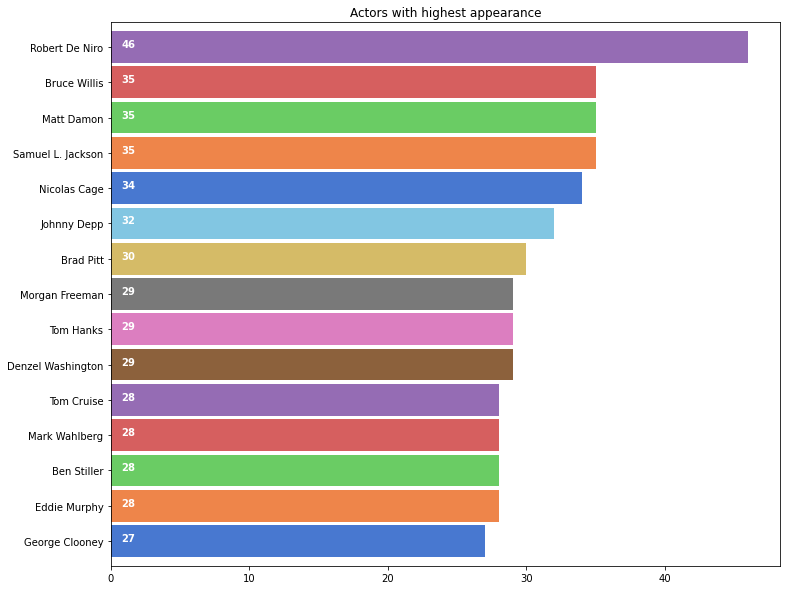

In [40]:
plt.subplots(figsize=(12,10))
list1=[]
for i in movies['cast']:
    list1.extend(i)
ax=pd.Series(list1).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('muted',40))
for i, v in enumerate(pd.Series(list1).value_counts()[:15].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=10,color='white',weight='bold')
plt.title('Actors with highest appearance')
plt.show()

<ipython-input-41-3e8f5a09b985>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['director'] = movies['director'].apply(xstr)


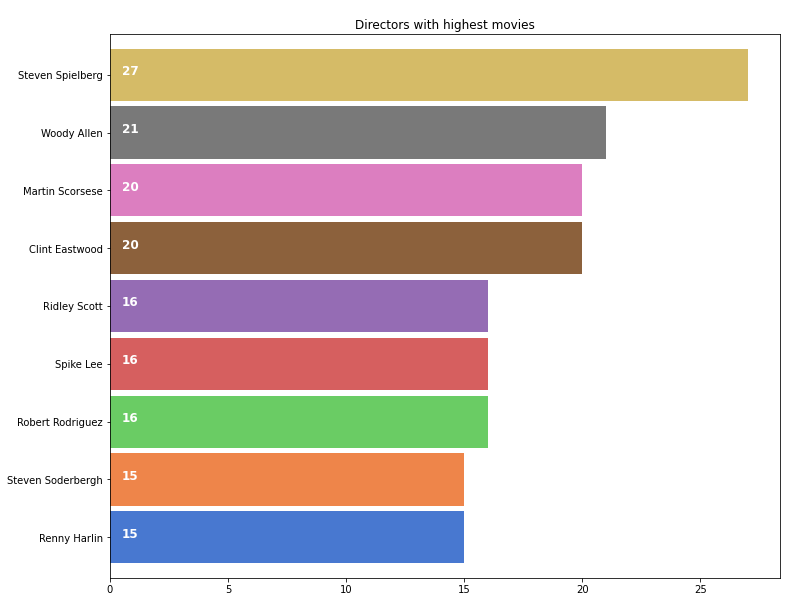

In [41]:
def xstr(s):
    if s is None:
        return ''
    return str(s)
movies['director'] = movies['director'].apply(xstr)
plt.subplots(figsize=(12,10))
ax = movies[movies['director']!=''].director.value_counts()[1:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('muted',40))
for i, v in enumerate(movies[movies['director']!=''].director.value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.5, i, v,fontsize=12,color='white',weight='bold')
plt.title('Directors with highest movies')
plt.show()

In [42]:
#Frequence des genres

movies['genres'] = movies['genres'].astype('str').str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['genres'] = movies['genres'].str.split(',')
movies['genres']

<ipython-input-42-ebcaff0a1f2a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['genres'] = movies['genres'].astype('str').str.strip('[]').str.replace(' ','').str.replace("'",'')
<ipython-input-42-ebcaff0a1f2a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['genres'] = movies['genres'].str.split(',')


0              [Action, Adventure, Fantasy]
1              [Adventure, Fantasy, Action]
2                [Action, Adventure, Crime]
3                    [Action, Crime, Drama]
4       [Action, Adventure, ScienceFiction]
                       ...                 
4798              [Action, Crime, Thriller]
4799                      [Comedy, Romance]
4800               [Comedy, Drama, Romance]
4801                                     []
4802                          [Documentary]
Name: genres, Length: 4803, dtype: object

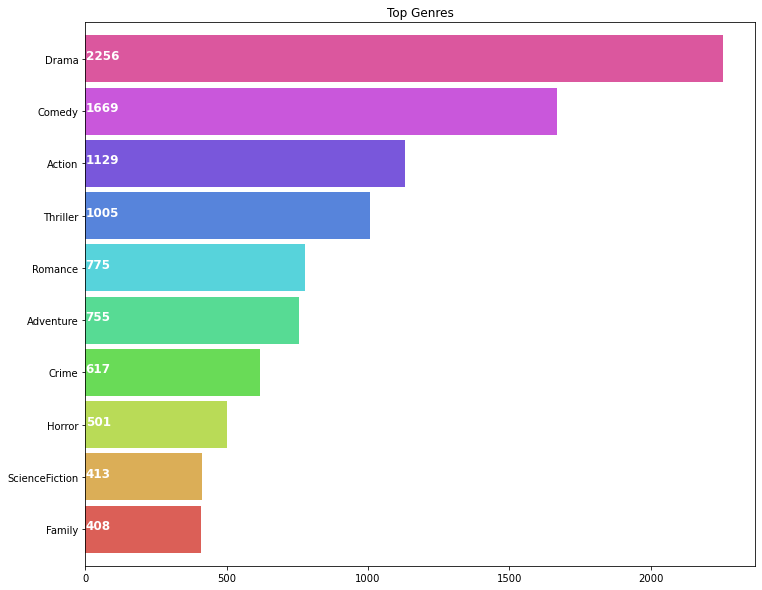

In [43]:
plt.subplots(figsize=(12,10))
list1 = []
for i in movies['genres']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top Genres')
plt.show()

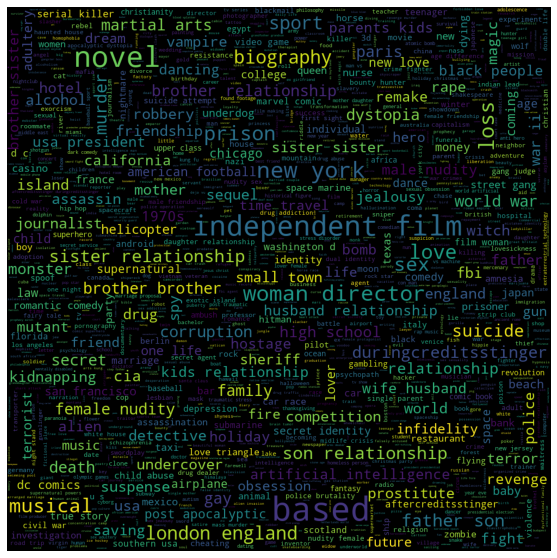

In [44]:
from wordcloud import WordCloud, STOPWORDS

words=movies['keywords'].dropna()
word=[]
for i in words:
    word.extend(i)
word=pd.Series(word)
#word=([i for i in word.str.lower() if i not in stop_words])
wc = WordCloud(background_color="black", max_words=2000, stopwords=STOPWORDS, max_font_size= 60,width=1000,height=1000)
wc.generate(" ".join(word))
plt.imshow(wc)
plt.axis('off')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

In [45]:
#Encore du traitement de données, il faut qu'on supprime 
#les espaces entre les noms et les transformer en lettres miniscules
#puisqu'il existe deux personnes ayant le même nom OU prénom.
#Le cas où deux personnes ont le même nom ET prénom n'est pas pris en considération
def lc_rm_space(row):
    if isinstance(row, list):
        return [str.lower(i.replace(" ", "")) for i in row]
    else:
        #Seulement si le directeur existe
        if isinstance(row, str):
            return str.lower(row.replace(" ", ""))
        else:
            return ''
for feature in ['cast', 'director', 'keywords', 'genres']:
    mv_df[feature] = mv_df[feature].apply(lc_rm_space)
mv_df[['title', 'cast', 'director', 'keywords', 'genres']].head()

,title,cast,director,keywords,genres
0,Avatar,"[samworthington, zoesaldana, sigourneyweaver]",jamescameron,"[cultureclash, future, spacewar]","[action, adventure, fantasy]"
1,Pirates of the Caribbean: At World's End,"[johnnydepp, orlandobloom, keiraknightley]",goreverbinski,"[ocean, drugabuse, exoticisland]","[adventure, fantasy, action]"
2,Spectre,"[danielcraig, christophwaltz, léaseydoux]",sammendes,"[spy, basedonnovel, secretagent]","[action, adventure, crime]"
3,The Dark Knight Rises,"[christianbale, michaelcaine, garyoldman]",christophernolan,"[dccomics, crimefighter, terrorist]","[action, crime, drama]"
4,John Carter,"[taylorkitsch, lynncollins, samanthamorton]",andrewstanton,"[basedonnovel, mars, medallion]","[action, adventure, sciencefiction]"


In [46]:
#Il est temps de créer la colonne infos 
#où on va concatener l'ensemble des données d'un film donnée 
def set_infos(row):
    return ' '.join(row['keywords']) + ' ' + ' '.join(row['cast']) + ' ' + row['director'] + ' ' + ' '.join(row['genres'])
mv_df['infos'] = mv_df[['title', 'cast', 'director', 'keywords', 'genres']].apply(set_infos,axis=1)

In [47]:
mv_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title,vote_average,vote_count,title_y,cast,crew,director,infos
0,237000000,"[action, adventure, fantasy]",http://www.avatarmovie.com/,19995,"[cultureclash, future, spacewar]",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[samworthington, zoesaldana, sigourneyweaver]","[{'credit_id': '52fe48009251416c750aca23', 'de...",jamescameron,cultureclash future spacewar samworthington zo...
1,300000000,"[adventure, fantasy, action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drugabuse, exoticisland]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[johnnydepp, orlandobloom, keiraknightley]","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",goreverbinski,ocean drugabuse exoticisland johnnydepp orland...
2,245000000,"[action, adventure, crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, basedonnovel, secretagent]",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[danielcraig, christophwaltz, léaseydoux]","[{'credit_id': '54805967c3a36829b5002c41', 'de...",sammendes,spy basedonnovel secretagent danielcraig chris...
3,250000000,"[action, crime, drama]",http://www.thedarkknightrises.com/,49026,"[dccomics, crimefighter, terrorist]",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[christianbale, michaelcaine, garyoldman]","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",christophernolan,dccomics crimefighter terrorist christianbale ...
4,260000000,"[action, adventure, sciencefiction]",http://movies.disney.com/john-carter,49529,"[basedonnovel, mars, medallion]",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[taylorkitsch, lynncollins, samanthamorton]","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",andrewstanton,basedonnovel mars medallion taylorkitsch lynnc...


In [48]:
#On est dans le bon chemin, il nous reste de reproduire 
#ce qu'on fait dans la section précédente en tenant compte 
#du changement au niveau de la classe
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrice = count.fit_transform(mv_df['infos'])

In [49]:
from sklearn.metrics.pairwise import cosine_similarity
#Pour obtenir la matrice de similarité
cosine_sim2 = cosine_similarity(count_matrice, count_matrice)

In [50]:
get_rec('Inception',cosine_sim2)

1568                       Looper
1431                 Premium Rush
4401          The Helix... Loaded
1715                      Timecop
1002                      The One
476                    Surrogates
1272                     Impostor
1815                        Taken
2047    Megiddo: The Omega Code 2
2244        The Cold Light of Day
Name: title, dtype: object

In [51]:
get_rec('Inception',cosine_sim)

2897                                Cypher
134     Mission: Impossible - Rogue Nation
1930                            Stone Cold
914                   Central Intelligence
1683                       Pitch Perfect 2
1248                        At First Sight
1512                 A History of Violence
2389                           Renaissance
1803                        Blood and Wine
1267                                Duplex
Name: title, dtype: object

    On obtient des films ayant plusieurs facteurs en commun.
    

#### Conclusion et évaluation des résultats:
        Le cas du film Inception, on remarque très bien que la liste des films obtenus est relativement logique. Alors qu'auparavant on obtenait Pitch Perfect 2 comme film recommandé, un film qui ne ressemble pas à notre input.
        Finalement, un système qu'on peut faire confiance. Mais pas trop!

# Recommandation basée sur le filtrage collaboratif:

    Cette technique est très utilisé dans le monde des systèmes de recommandation. Elle consiste à fournir des recommandations en se basant sur les préférences de tous les utilisateurs, et en trouvant les similarités entre les produits (les films dans notre cas) ainsi que la similarité entre les utilisateurs. voir les explications dans l'image ci-dessous.

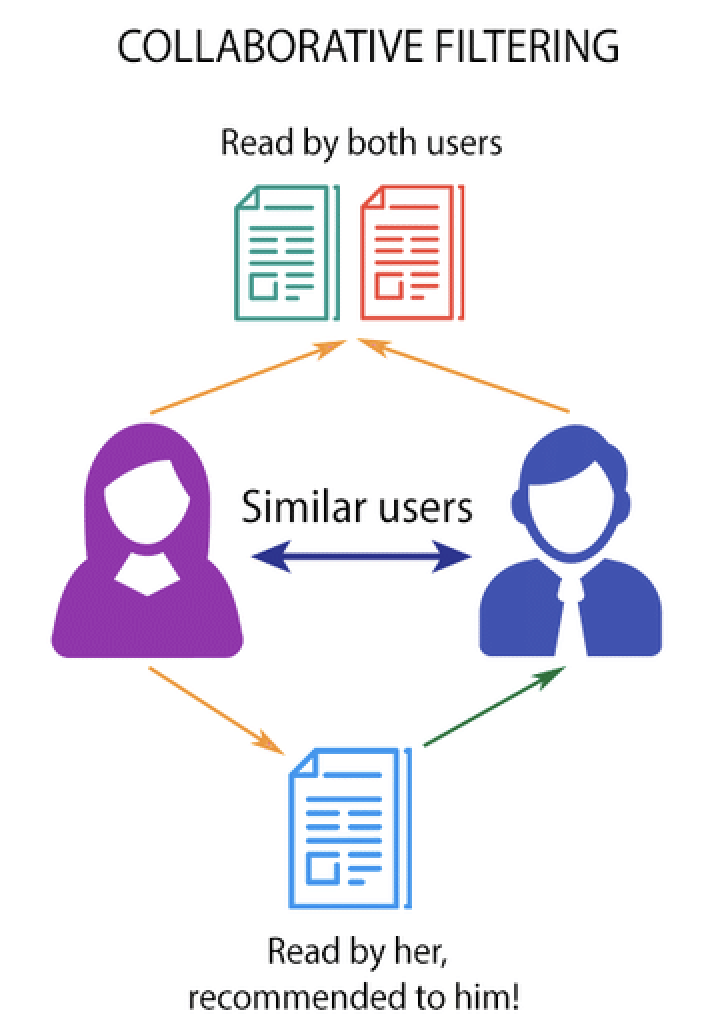

In [52]:
Image('./CF.png')

    Pour ce faire on utilisera une autre dataset proposée par le site https://grouplens.org/datasets/movielens/ , on prendra la version éducative et de développement. qui présente à son tour deux version 'small' et 'full'. On commencera tout d'abord par la version 'small'.
    A présent on a dans notre fichier 4 datasets (links, movies, ratings, tags), mais nous nous intéressons qu'aux deux datasets (movies et ratings).
    Il est à noter que cette plateforme n'offre plus des cross-folds pré-calculés ou bien des scripts pour la cross-validation. Alors, on traitera ceci ensemble.

In [53]:
ratings = pd.read_csv('./ml-latest-small/ratings.csv')
movies = pd.read_csv('./ml-latest-small/movies.csv')

In [54]:
movies.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [55]:
movies.shape

(9742, 3)

    Bien évidemment, il s'agit d'une dataset plus grande que la dernière.
    On remarque que les années sont concatenees aux titres des films. On peut faire un petit traitement la-dessus, sauf qu'on n'en aura pas besoin.

In [56]:
ratings.head(3)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224


    D'après le fichier Readme, chaque utilisateur a noté au minimum une vigntaine de films.

In [57]:
ratings['userId'].value_counts().sort_values(ascending=False)

414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
189      20
147      20
595      20
431      20
406      20
Name: userId, Length: 610, dtype: int64

In [58]:
ratings['userId'].value_counts().mean()

165.30491803278687

    Effectivement parmi les 610 utilisateurs en questions, le nombre de films notés varie entre 20 et 2698, et avec une moyenne de 165.

#### Petit apperçu sur la méthode choisie:
    Maintenant, il faut rappeler qu'il existe plusieurs catégories au niveau du fltrage collaboratif, on cite:
       - Memory Based
       - Model Based
    On s'interssera dans ce projet à la première catégorie, qui offre la possibilité d'adopter une des deux méthodes (User based) ou (Item based). Et comme d'habitude, une méthode n'est aucunement meilleure que l'autre, tout dépendera du cas d'utilisation.
    En ce qui touche notre cas, il vaut mieux d'utiliser la première approche qui est le User based. Ainsi, il nous faut répondre à deux grandes questions ?
        1 - Comment trouver les utilisateurs similaires à un utilisateur U et qui ont déjà noté le film F?
        2 - Comment calcule-t-on la note N (ayant en mains les utilisateurs similaires)?

In [59]:
#Sans trop tarder, on essaye de trouver les n Utilisateurs similaires à notre utilisateur U
#L'utilisation du package surprise nous facilitera la tâche considérablement
from surprise import Dataset
from surprise import Reader

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['userId','movieId','rating']], reader)

In [60]:
#Après avoir préparé le format de la dataset
#on appliquera l'algorithme k-NN (K-Nearest Neighbours)
#Nous avons choisi cet algorithme en premier, 
#par ce que c'est le plus proche à concrétiser une réponse à notre première question
#Dans le monde des mathématiques, on parle de la distance euclidienne ou bien la fonction de cosinus
#En algorithmique, k-NN permet d'appliquer la formule de cosinus

from surprise import KNNWithMeans
#On prend, dans un premier temps, le nombre 4 comme un minimum de films 
#en commun pour que la similarité ne vaille pas 0
sim_options = {
    'name': 'cosine',
    'user_based':True,
    'min_support':4
}
knn = KNNWithMeans(sim_options=sim_options)


In [61]:
train_set = data.build_full_trainset()
knn.fit(train_set)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [62]:
pred = knn.predict(1,2)
pred.est

4.151991713118896

    Notre algorithme prédit que l'utilisateur donnera une note de 4.15

In [63]:
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [64]:
#sur un film déjà noté (3.0) par l'utilisateur 1
pred = knn.predict(1,70)
pred.est

4.241764974580226

    On remarque que la prédiction est loin de la valeur réelle

    En effet, ce que nous venons de faire ne constitue que des constatations sur le résultat de notre algorithme. Alors que pour évaluer notre système, il nous foudra utiliser les méthodes de cross validation et d'évaluation des performances on cite les fameux Accuracy, Precision, Recall, F1-Score etc. Sauf que ces métriques sont dédiées aux problèmes de classification. 
    Dans notre cas (Regression) nous allons utiliser le RMSE (Root Mean Square Error) ainsi que le MAE (Mean Absolute Error) (RMSE plus que le MAE)
    RMSE consiste tout simplement à prédire les notes des films attribuées par des utilisateurs dans la test-dataset (sachant que ces notes sont déjà données) et puis calculer l'erreur qui est la différence entre la note prédite et la note réelle. Ensuite calculer la racine carrée de la moyenne des erreurs aux carrées.
    Mais comme on a décidé d'utiliser la librairie Surprise, on dispose d'une classe GridSearchCV à laquelle on passe l'algorithme, le nom de la méthode (pour le calcul de distance entre les vecteurs) ainsi que les mesures d'évaluation à savoir RMSE et MAE.
    

    En d'autres termes, afin de déterminer le meilleur algorithme ainsi que sa meilleure configuration, on opte pour la classe GridSearchCV qui permet d'utiliser les différentes combinaisons (configurations) pour un nombre de folds (K-Fold).
    Dans ce contexte, on essayera, dans un premier temps, de comparer entre les configurations au niveau du même algorithme. Puis en deuxième temps, on comparera entre les algorithmes.

## KNNWithMeans (cross-validation)

### Temps d'exécution important

    Rien qu'à partir de cette dataframe, on peut déterminer la meilleure config en se basant sur la métrique RMSE ou MAE.
    Encore mieux cette classe offre deux méthodes qui donnent directement la meilleure config.
    Mais nous allons, juste pour cette première ..., visualiser les différentes config.


## KNNBaseline (cross-validation)

### Temps d'exécution important

## SVD (cross-validation)

### Temps d'exécution important

    La plus petite valeur de RMSE obtenue est de l'ordre de 0.85 (KNNBaseline)
    0.85 reste une valeur peu grande pour la RMSE puisqu'il s'agit d'une notation entre 0.5 et 5


    On essaye avec la grande dataset, pour voir si on peut améliorer le résultat

   
   ### ATTENTION (UTILISATION D'UNE AUTRE DATASET)
    Acceder à https://grouplens.org/datasets/movielens/latest/
    Puis, Il faut télécharger le fichier 'ml-latest.zip' et l'extraire dans un répertoire 'ml-latest' existant au même répertoire que le projet

    On n'a pas testé avec les deux autres algorithmes, vue qu'ils prennent un énorme temps pour s'éxecuter.
    En ce qui concerne le résultat obtenu par l'application de l'algorithme SVD. On remarque que même en fournissant plus de donnéé (27753444 ratings (fill_dataset) vs. 100000 ratings (small_dataset)), l'amélioration s'avère très minime.
    0.1 d'amélioration n'est pas intéressante en tenant compte de l'augmentation de temps d'execution. Sauf qu'on peut toujours opter pour la version complète de la dataset, si on veut bien couvrir plus de films.
   

## Résultat avec KNNBaseline

    Après ces petits tests, nous allons utiliser l'algorithme KNNBaseline, puisqu'il donne des résultats intéressants avec 0.85 de RMSE.

In [65]:
films_notes = ratings[ratings['userId']==1]['movieId'].tolist()
len(films_notes)

232

In [66]:
from surprise.prediction_algorithms import KNNBaseline

sim_options = {'name': 'pearson_baseline', 'user_based': False, 'min_support': 1, 'shrinkage': 200}

knn = KNNBaseline(sim_options=sim_options)

train_set = data.build_full_trainset()
knn.fit(train_set)

def get_reco(user_id):
    global knn
    films_notes = ratings[ratings['userId']==user_id]['movieId'].tolist()
    films_all = movies['movieId'].tolist()
    nv_notes=[]
    films_non_notes=[]
    for i in films_all:
        if not i in films_notes:
            films_non_notes.append(i)
            nv_notes.append(knn.predict(user_id,i).est)
    
    df = pd.DataFrame.from_dict({'movieId':films_non_notes,
                            'rating':nv_notes
                            })
    seuil = df['rating'].quantile(0.99)
    df = df[df['rating']>seuil].sort_values('rating',ascending=False)
    df = df.merge(movies[['movieId','title']],on='movieId')
    return df[['title','rating']]         

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [67]:
#On affiche les top 20 pour l'utilisateur 1
get_reco(1).head(20)

,title,rating
0,"Shawshank Redemption, The (1994)",5.000000
1,Above the Law (1988),5.000000
2,"Great Escape, The (1963)",5.000000
3,Cool Hand Luke (1967),5.000000
4,Casablanca (1942),5.000000
5,North by Northwest (1959),5.000000
6,"5,000 Fingers of Dr. T, The (1953)",4.961620
7,"Lord of the Rings: The Return of the King, The...",4.946687
8,The Edge of Seventeen (2016),4.938466
9,Dr. Strangelove or: How I Learned to Stop Worr...,4.937432


    On obtient alors 1% des films avec les plus hautes notes.

# Mixture
    Notre idée consiste tout simplement à exploiter et mélanger l'ensemble des solutions conçues. Pour offrir un résultat relativement intéressant.
    La démarche est la suivante :
        1 - On fournit un utilisateur U1 et on récupère son historique des films ayant une note supérieure à 4 (Liste A)
        2 - On applique sur cette liste A la recommandation basée sur la description et sur le contenu pour obtenir une liste B des films recommandées
        3 - On applique la recommandation basée sur le filtrage collaboratif sur l'utilisateur U1 pour obtenir une liste C des films recommandées
        4 - L'intersection de la liste B et la liste C fera apparaître notre liste de films à recommander finalement à notre utilisateur U1

## 0 - Préparation des données :
    Afin d'appliquer ce processus, on doit assurer que les titres sur les deux dataset se ressemblent. Et ce n'est pas vraiment le cas, du fait qu'au niveau de la deuxième dataset, les titres comprennent l'année de production.
    Dans ces conditions, on doit effectuer quelques traitements sur la deuxième dataset pour la matcher avec la première.

In [68]:
def clean_titre(row):
    row['title'] = row['title'].split(' (')[0]
    if ',' in row['title']:
        row['title'] = row['title'].split(', ')[0]
    if '...' in row['title']:
        row['title'] = row['title'].split('...')[0]
    
    return row

In [69]:
#On teste
top20 = get_reco(1).head(50).apply(clean_titre,axis=1)
top20.head(50)

,title,rating
0,Shawshank Redemption,5.000000
1,Above the Law,5.000000
2,Great Escape,5.000000
3,Cool Hand Luke,5.000000
4,Casablanca,5.000000
5,North by Northwest,5.000000
6,"5,000 Fingers of Dr. T",4.961620
7,Lord of the Rings: The Return of the King,4.946687
8,The Edge of Seventeen,4.938466
9,Dr. Strangelove or: How I Learned to Stop Worr...,4.937432


## 1 - Liste A : Historique des films ayant une note supérieure à 4

In [70]:
def get_hist(user_id):
    films_notes = ratings[ratings['userId']==user_id][['movieId','rating']]
    seuil = 4
    df = films_notes[films_notes['rating']>4].sort_values('rating',ascending=False)
    df = df.merge(movies[['movieId', 'title']],on='movieId')
    return df[['title']]    

In [71]:
hist = get_hist(1).apply(clean_titre,axis=1)
hist.head(20)

,title
0,Seven
1,Very Bad Things
2,Run Lola Run
3,Wolf Man
4,Superman II
5,SLC Punk!
6,Go
7,Matrix
8,Lock
9,Planet of the Apes


In [72]:
list_a = hist['title'].tolist()

In [73]:
len(list_a)

124

In [74]:
list_a

['Seven',
 'Very Bad Things',
 'Run Lola Run',
 'Wolf Man',
 'Superman II',
 'SLC Punk!',
 'Go',
 'Matrix',
 'Lock',
 'Planet of the Apes',
 'Office Space',
 'Crocodile Dundee',
 'Texas Chainsaw Massacre',
 'Thin Red Line',
 'Rushmore',
 'Enemy of the State',
 'Usual Suspects',
 'American History X',
 'Edward Scissorhands',
 'NeverEnding Story',
 'American Tail',
 'Secret of NIMH',
 "Charlotte's Web",
 'Lord of the Rings',
 'Indiana Jones and the Temple of Doom',
 'Rocketeer',
 'Rescuers',
 'Jungle Book',
 'Negotiator',
 'Great Mouse Detective',
 'South Park: Bigger',
 'Ghostbusters',
 'Iron Giant',
 'American Beauty',
 'X-Men',
 'Shaft',
 'Road Warrior',
 'Mad Max',
 'Blazing Saddles',
 'Gladiator',
 'Grumpy Old Men',
 'Good Morning',
 'Red Dawn',
 'JFK',
 'Scream 3',
 "Wayne's World",
 'Green Mile',
 'Messenger: The Story of Joan of Arc',
 'Dogma',
 'Robin Hood',
 'Spaceballs',
 'Thunderball',
 'Live and Let Die',
 'Who Framed Roger Rabbit?',
 'Fight Club',
 'Dr. No',
 'From Russia w

## 2 - Liste B : Recommandation basée sur la description et sur le contenu de la Liste A

In [75]:
def get_rec_listb(list_a):
    rec1=set()
    rec2=set()
    for film in list_a:
        rec1 = rec1.union(set(get_rec(film,cosine_sim)))
        rec2 = rec2.union(set(get_rec(film,cosine_sim2)))
    return rec1.union(rec2)

In [76]:
list_b = get_rec_listb(list_a)
len(list_b)

891

In [77]:
type(list_b)

set

## 3 - Liste C : Recommandation basée sur le filtrage collaboratif

In [78]:
list_c = get_reco(1).apply(clean_titre,axis=1)

In [79]:
list_c.head()

,title,rating
0,Shawshank Redemption,5.0
1,Above the Law,5.0
2,Great Escape,5.0
3,Cool Hand Luke,5.0
4,Casablanca,5.0


## 4 - Liste finale des films à recommander

In [80]:
def intersection(row):
    global list_b
    if row['title'] in list_b:
        return 1
    return 0

#### On inclut finalement les films ayant une note egale à 5 juste par ce que il se peut qu'ils ne figurent pas dans la première dataset

In [81]:
def liste_finale(list_b, list_c):
    #Rappel que la liste b est une set et la liste c est une dataframe
    list_c['intersection'] = list_c.apply(intersection,axis=1)
    return list_c[(list_c['intersection']==1)|(list_c['rating']==5)][['title','rating']]

## La fonction finale 

In [82]:
def mixture_rec(user_id):
    #etape 1
    hist = get_hist(user_id).apply(clean_titre,axis=1)
    list_a = hist['title'].tolist()
    #etape 2
    list_b = get_rec_listb(list_a)
    #etape 3
    list_c = get_reco(user_id).apply(clean_titre,axis=1)
    #etape 4
    return liste_finale(list_b, list_c)

In [83]:
result = mixture_rec(1)

In [84]:
len(result)

15

In [99]:
result

,title,rating
0,Shawshank Redemption,5.000000
1,Above the Law,5.000000
2,Great Escape,5.000000
3,Cool Hand Luke,5.000000
4,Casablanca,5.000000
5,North by Northwest,5.000000
27,Recess: School's Out,4.832962
42,Raging Bull,4.776278
48,Spirited Away,4.762822
64,Fantastic Mr. Fox,4.738392


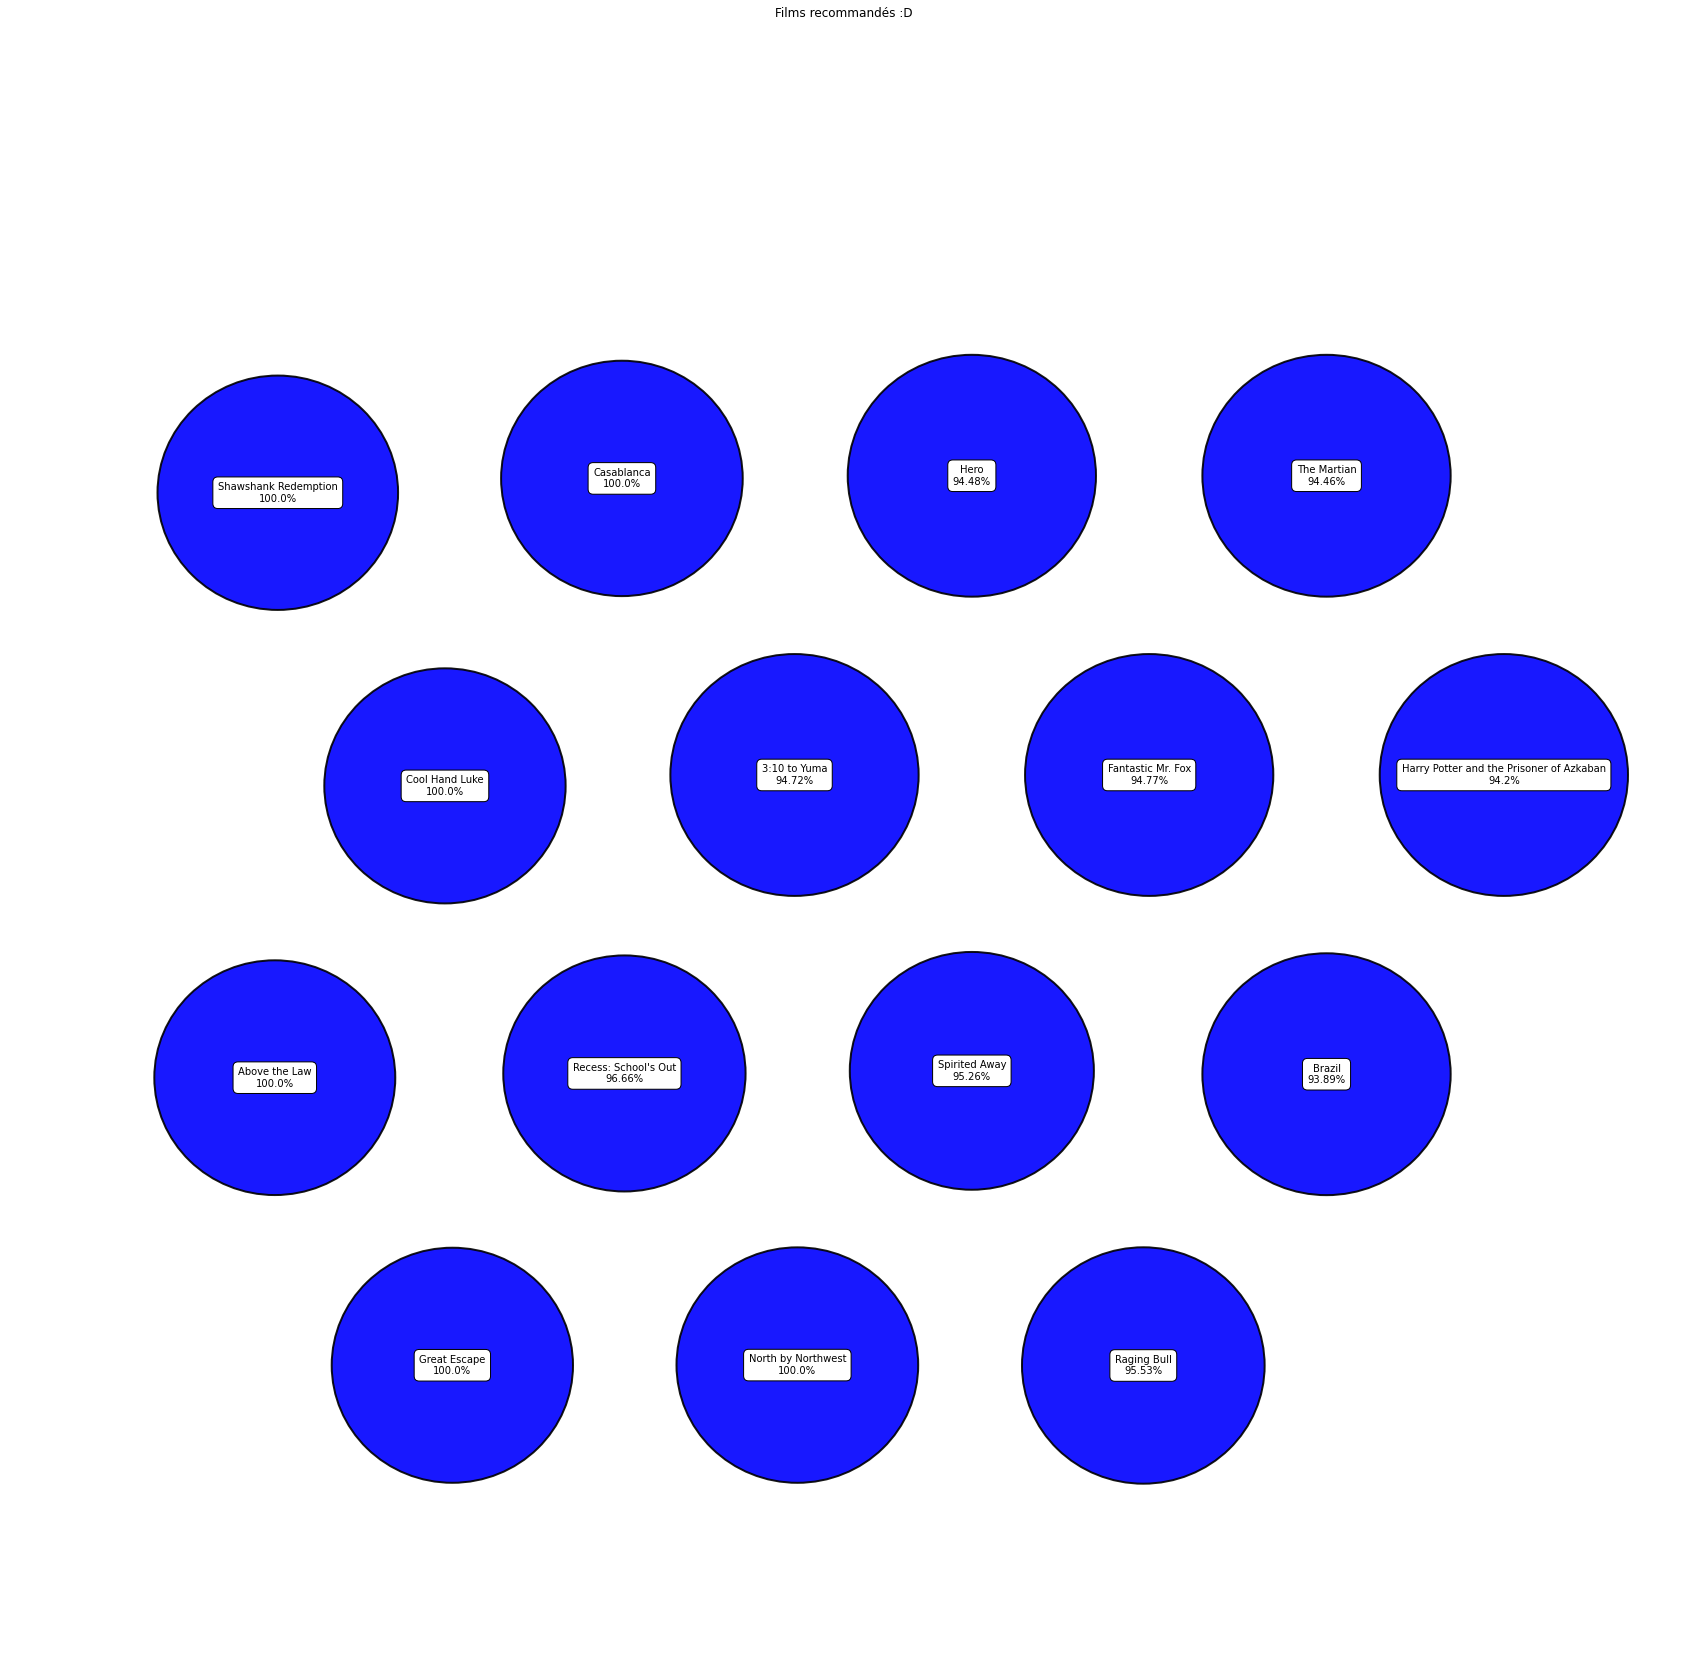

In [123]:
# import the circlify library
import circlify
import math
# compute circle positions:
circles = circlify.circlify(
    result['rating'].apply(lambda x:x).tolist(), 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)


# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(30,30))

# Title
ax.set_title('Films recommandés :D')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)

plt.xlim(-lim, lim)
plt.ylim(-lim, lim)


titres_affiches = []
for i in range(len(result)):
    titres_affiches.append(result['title'].tolist()[i]+'\n'+str(round(result['rating'].apply(lambda x:x*20).tolist()[i],2))+'%')


# list of labels
labels = titres_affiches

# print circles
for circle, label in zip(circles, labels):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r*0.7, alpha=0.9, linewidth=2, facecolor="#0000ff", edgecolor="black"))
    plt.annotate(label, (x,y ) ,va='center', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=.5))

# Conclusion:
    
    In fine, ce travail permet d'obtenir des différents résultats de recommandation suivant la méthode utilisée. Ceci n'implique nullement que la pértinence d'un résultat dépend de la méthode, du fait que chaque méthode a des avantages comme des inconvénients. Chose qui nous a motivé de faire un mélange des méthodes, en suivant une démarche bien particulière, et qui nous a fournit finalement un résultat relativement intéressant et pertinent.